# Solutions for 2D solute transport in uniform background flow
This notebook shows some examples of two-dimensional solute transport in uniform background flow. The examples are based on [Wexler (1992)](https://doi.org/10.3133/twri03B7), as is the underlying code.

Solutions for 2D solute transport are applicable to relatively thin aquifers where the solute is well-mixed along the vertical axis and vertical concentration gradients become negligible. Alternatively, 2D solutions can be applied to a cross-section along the centerline of a plume where the model y-dimension represents the vertical axis. In those cases, it is assumed that the concentration gradients perpendicular to the centerline can be neglected, as is the case for wide solute sources. 

A solution for a point source in an infinite aquifer is presented, as well as solutions for so-called 'strip' sources, which are constant-concentration sources in a semi-infinite aquifer. The source location is placed at `x = 0` and extends along the y-axis.

The solutions for transport in uniform background flow are available as functions from the `uniform` module and can be imported and called as:

In [1]:
from adepy.uniform import point2

point2(
    c0=100.0,
    x=[5, 10],
    y=[0, 0],
    t=60,
    v=0.05,
    n=0.25,
    al=1.0,
    ah=0.1,
    Qa=1,
    xc=0,
    yc=0,
)

array([603.55375676,   3.93583344])

## Infinite aquifer with a continuous point source

The `adepy.unfiform.point2` solution can be applied to simulate 2D transport with a continuous point source in an infinite aquifer. As discussed above, this may be applicable if the concentration is well-mixed over the aquifer thickness. Another use case is if the point source represents a line source fully screened across the aquifer thickness and with an even distribution of injected mass along the line length. A third-type boundary is applied at the point source whereby water with a known, constant concentration is injected at a constant rate per unit aquifer thickness. It is assumed that the injection rate is small so that the flow field remains uniform.

As an example, an abandoned borehole penetrates a brackish confined aquifer and is discharging into an overlying freshwater aquifer. This corresponds to sample problem 5 in [Wexler (1992)](https://doi.org/10.3133/twri03B7).

In [2]:
# imports used across the examples
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

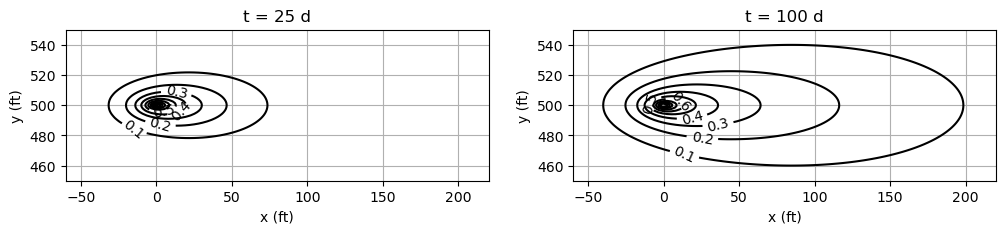

In [3]:
# Import the 2D solution for solute transport for a continuous point source in an infinite aquifer
from adepy.uniform import point2

Q = 1250  # injection rate, ft³/d
B = 100  # aquifer thickness, ft

v = 2  # # linear groundwater flow velocity, ft/h
al = 30  # longitudinal dispersivity, ft
ah = 6  # horizontal transverse dispersivity, ft
c0 = 1000  # injection concentration, mg/L
xc = 0  # point source x-coordinate
yc = 500  # point source y-coordinate
n = 0.25  # aquifer porosity, -

Qa = Q / B  # injection rate per unit aquifer thickness, ft²/d

# Set the output x-y coordinates and t values
x, y = np.meshgrid(np.linspace(-60, 220, 100), np.linspace(450, 550, 100))
t = [25, 100]

# calculate and plot the normalized concentrations at two times
c = []
fig, ax = plt.subplots(1, len(t), figsize=(12, 4))

for i, ti in enumerate(t):
    c.append(point2(c0, x, y, ti, v, n, al, ah, Qa, xc, yc))
    cs = ax[i].contour(x, y, c[i] / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"t = {ti} d")

## Bounded aquifer with a strip source

The `adepy.uniform.stripf` algorithm can be used to simulate 2D solute transport originating from a strip source at `x = 0` in a bounded aquifer. The aquifer is finite in the y-extent, and semi-infinite in the x-direction (no solution for negative x-values, i.e. upstream from the source). Impermeable boundaries are placed at the finite ends of the aquifer's y-extend, where the concentration gradient across the boundary is fixed at zero so the solute can not pass through. This solution may be valid for thin aquifers with a limited width, for example embedded in less-permeable or impermeable sediments which are close enough to the source as to affect its spread. As an example, chloride migration from a landfill leachate in a narrow and thin valley-infill aquifer is simulated, corresponding to sample problem 6 in [Wexler (1992)](https://doi.org/10.3133/twri03B7). Note the effect of the impermeable aquifer boundary at `y = 0`.

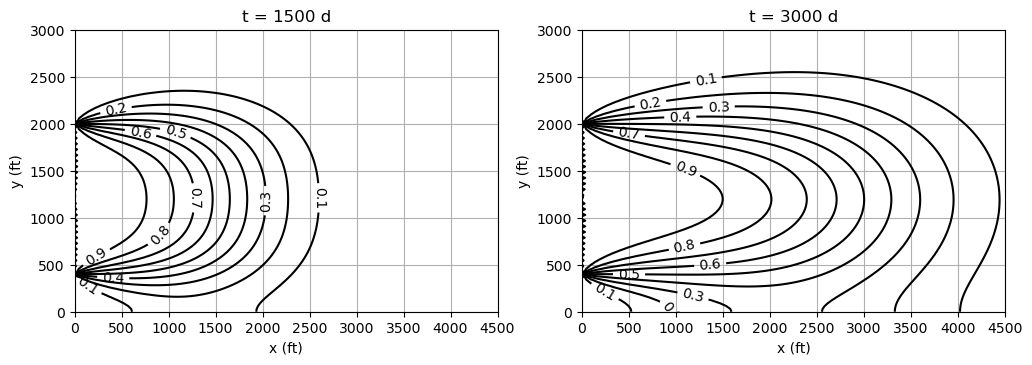

In [4]:
from adepy.uniform import stripf

w = 3000  # aquifer width, starting at y = 0, ft
y1 = 400  # lower y-coordinate for the source, ft
y2 = 2000  # upper y-coordinate for the source, ft
v = 1  # uniform background flow velocity, ft/d
al = 200  # longitudinal dispersivity, ft
ah = 60  # horizontal transverse dispersivity, ft
c0 = 1000  # source concentration, mg/L

x, y = np.meshgrid(
    np.linspace(0, 4500, 100), np.linspace(0, 3000, 100)
)  # output x-y locations, ft
t = [1500, 3000]  # output times, d

c = []
fig, ax = plt.subplots(1, len(t), figsize=(12, 4))

# compute and plot normalized concentrations
for i, ti in enumerate(t):
    c.append(stripf(c0, x, y, ti, v, al, ah, y1, y2, w))

    cs = ax[i].contour(x, y, c[i] / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"t = {ti} d")

## Semi-infinite aquifer with a strip source

The resulting 2D concentration field from a strip source placed at `x = 0` in a semi-infinite aquifer can be simulated using `adepy.uniform.stripi`. The aquifer is infinite in the y-direction and in the positive x-direction. For locations upstream of the source (i.e. negative x-values), the solution is undefined. The example below simulates the fate of a contaminant from a waste-disposal site through a thin glacial aquifer (sample problem 7 in [Wexler (1992)](https://doi.org/10.3133/twri03B7)).

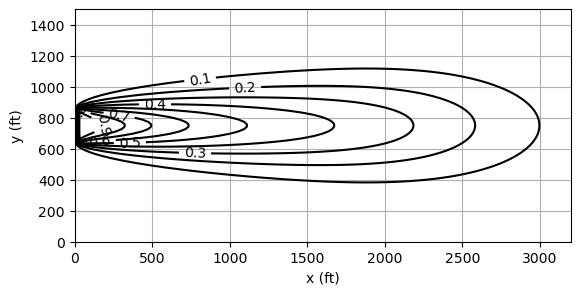

In [5]:
from adepy.uniform import stripi

y1 = 635  # lower y-coordinate for the source, ft
y2 = 865  # upper y-coordinate for the source, ft
v = 1.42  # uniform background flow velocity, ft/d
al = 70  # longitudinal dispersivity, ft
ah = 14  # horizontal transverse dispersivity, ft
c0 = 40  # source concentration, mg/L

x, y = np.meshgrid(
    np.linspace(0, 3200, 100), np.linspace(0, 1500, 100)
)  # output x-y locations, ft
t = 5 * 365  # output time

c = stripi(c0, x, y, t, v, al, ah, y1, y2)  # simulated concentrations, mg/L

# plot normalized concentration contours
cs = plt.contour(x, y, c / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
plt.clabel(cs, fmt="%.1f")
plt.gca().set_aspect(1.0)
plt.xlabel("x (ft)")
plt.ylabel("y (ft)")
plt.grid()

## Semi-infinite aquifer with a Gaussian strip source

The `adepy.uniform.gauss` function provides a solution for 2D solute transport coming from a strip source at `x = 0` in a semi-infinite aquifer where the source concentration along the y-axis follows a Gaussian distribution. The aquifer is infinite in the y-direction and in the positive x-direction. No solution is available for locations upstream of the source (negative x-values). This solution is useful if the concentration at the source, or downstream from the source, can be approximated by a Gaussian distribution. For example, if several sampling wells are placed along a line perpendicular to the flow direction at some distance downstream from a small source. The concentration at the source is unknown in that case, but along the downstream well trajectory the concentration distribution would approximate a Gaussian distribution. The line where the sampling wells are placed would then correspond to the Gaussian strip source at `x = 0` in the model. The y-location at `x = 0` where the maximum concentration is measured is required as input, as well as the standard deviation of the Gaussian distribution along the y-axis, in length units. See [Wexler (1992)](https://doi.org/10.3133/twri03B7) for several techniques to determine this standard deviation from sampled concentrations. 

As an example, the fate of a conservative solute in a thin aquifer of infinite width originating from a waste-disposal site is simulated. The concentration distribution of the source is considered Gaussian. In the first example, the standard deviation of the source distribution is known. For the second example, a smaller standard deviation was used, calculated from concentrations measured in 11 sampling wells parallel to the y-axis at 500 ft downgradient from the waste-disposal site by fitting a Gaussian curve to the data (see sample problems 8a and 8b in [Wexler (1992)](https://doi.org/10.3133/twri03B7)). The strip source (`x = 0`) is placed at this sampling line. 

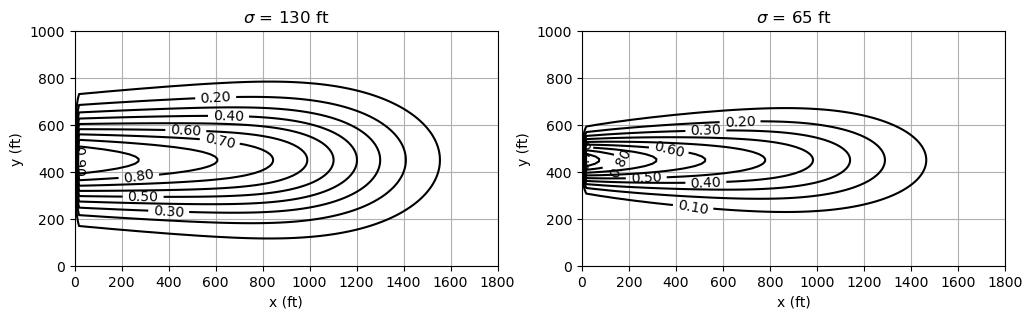

In [6]:
from adepy.uniform import gauss

c0 = 1000  # maximum source concentration, mg/L
yc = 450  # y-location of maximum source concentration, ft
sigma = [  # standard deviations of the Gaussian concentration distribution along the y-axis, ft
    130,
    65,
]
v = 4  # uniform background flow velocity, ft/d
al = 37.5  # longitudinal dispersivity, ft
ah = 7.5  # horizontal transverse dispersivity, ft

x, y = np.meshgrid(  # output x-y locations, ft
    np.linspace(0, 1800, 100), np.linspace(0, 1000, 100)
)
t = 300  # output time, d

# calculate and plot the normalized concentration contours
c = []
fig, ax = plt.subplots(1, len(sigma), figsize=(12, 6))

for i, s in enumerate(sigma):
    c.append(gauss(c0, x, y, t, v, al, ah, yc, s))

    cs = ax[i].contour(x, y, c[i] / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
    ax[i].clabel(cs, fmt="%.2f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"$\\sigma$ = {s:.0f} ft")